## EDA UNIVARIANTE LISTADO PARTES ##


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
pd.options.mode.copy_on_write = True # CoW por defecto a partir de pandas 3.0.0

In [13]:
#Carga de dataset
df_partes = pd.read_csv("./datasets/ListadoPartes_limpio.csv")


In [14]:
df_partes.shape


(625, 18)

In [15]:
df_partes.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   nif                  625 non-null    object
 1   fechaparteaccidente  625 non-null    object
 2   fechaaltaparte       625 non-null    object
 3   descripcionparte     625 non-null    object
 4   actividad            625 non-null    object
 5   lugar                625 non-null    object
 6   fecharecepcion       625 non-null    object
 7   macizomontanoso      622 non-null    object
 8   entrenamiento        625 non-null    bool  
 9   actividadpersonal    625 non-null    bool  
 10  actividadorganizada  625 non-null    bool  
 11  festivo              625 non-null    bool  
 12  nresponsables        625 non-null    int64 
 13  tamanogrupo          625 non-null    int64 
 14  descripciongrado     583 non-null    object
 15  pais                 625 non-null    object
 16  provinci

In [16]:
df_partes.isna().sum()

nif                     0
fechaparteaccidente     0
fechaaltaparte          0
descripcionparte        0
actividad               0
lugar                   0
fecharecepcion          0
macizomontanoso         3
entrenamiento           0
actividadpersonal       0
actividadorganizada     0
festivo                 0
nresponsables           0
tamanogrupo             0
descripciongrado       42
pais                    0
provincia               0
tipoaccidente           0
dtype: int64

In [17]:
# variables categoricas 
df_partes.select_dtypes(include="object").columns


Index(['nif', 'fechaparteaccidente', 'fechaaltaparte', 'descripcionparte',
       'actividad', 'lugar', 'fecharecepcion', 'macizomontanoso',
       'descripciongrado', 'pais', 'provincia', 'tipoaccidente'],
      dtype='object')

In [18]:
# siniestros por tipo de accidente
# aqui se  describe qué tipo de siniestros son más frecuentes.

df_partes['tipoaccidente'].value_counts()


tipoaccidente
Tropiezos (caída al mismo nivel)                                             248
Problemas físicos                                                            146
Caída en vertical                                                            103
Deslizamiento por pendiente                                                   41
Colisión con rocas                                                            28
Colisión con objetos                                                           9
Caída de piedras                                                               6
Colisión con personas                                                          4
Otro: ......                                                                   3
Otro: ....                                                                     3
Otro: .....                                                                    2
Otro: ........                                                                 2
Otro: Corte co

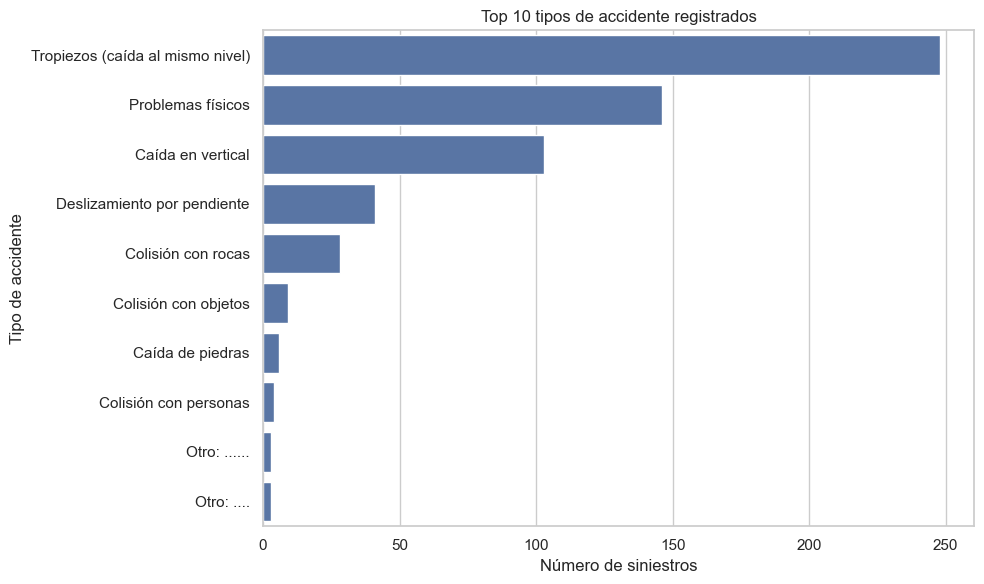

In [19]:
# Distribución univariable del tipo de accidente
# Seleccionamos los 10 tipos de accidente más frecuentes

top_10_accidentes = df_partes['tipoaccidente'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(
    x=top_10_accidentes.values,
    y=top_10_accidentes.index
)

plt.title("Top 10 tipos de accidente registrados")
plt.xlabel("Número de siniestros")
plt.ylabel("Tipo de accidente")

plt.tight_layout()
plt.show()


In [20]:
# Gravedad del accidente 
df_partes['descripciongrado'].value_counts()


descripciongrado
leve      521
grave      56
mortal      6
Name: count, dtype: int64

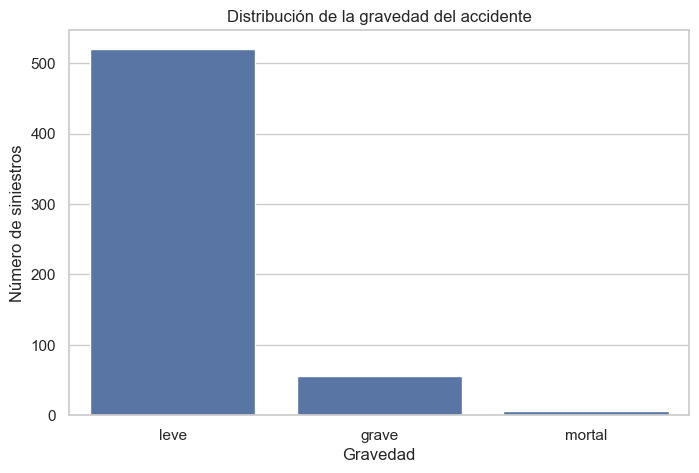

In [21]:
plt.figure(figsize=(8, 5))
sns.countplot(
    data=df_partes,
    x='descripciongrado',
    order=df_partes['descripciongrado'].value_counts().index
)
plt.title("Distribución de la gravedad del accidente")
plt.xlabel("Gravedad")
plt.ylabel("Número de siniestros")
plt.show()


In [22]:
# Actividad asociada al siniestro
df_partes['actividad'].value_counts().head(10)


actividad
Senderismo                                   166
Carreras por montaña                          97
Escalada en escuela                           87
Rocódromo                                     63
Montañismo/Progresión por terreno abrupto     60
BTT                                           34
Esquí Alpino                                  27
Escalada alta montaña                         16
Alpinismo                                     16
Esquí de montaña/Splitboard                   13
Name: count, dtype: int64

In [23]:
# Análisis geográfico provincia 
df_partes['provincia'].value_counts().head(10)


provincia
MADRID         393
-               44
HUESCA          40
GUADALAJARA     21
LLEIDA          14
SEGOVIA         12
ALICANTE        10
ÁVILA           10
ASTURIAS         9
LEÓN             7
Name: count, dtype: int64

In [24]:
# Variables numericas
df_partes.select_dtypes(include=["int64", "float64"]).describe()


,nresponsables,tamanogrupo
count,625.000000,625.00000
mean,1.336000,7.16000
std,4.602717,30.68241
min,0.000000,0.00000
25%,0.000000,1.00000
50%,1.000000,2.00000
75%,1.000000,3.00000
max,100.000000,400.00000


In [25]:
# se puede tomar tamaño del grupo para interpretar un poco el accidente 
df_partes['tamanogrupo'].value_counts().sort_index()



tamanogrupo
0       80
1      189
2      149
3       53
4       31
5       24
6       19
7        8
8       10
9        4
10       9
11       1
12       3
13       1
14       1
15       3
17       1
18       1
19       1
20      11
21       1
24       3
25       2
29       1
30       1
35       1
40       2
45       1
50       2
59       1
80       1
100      1
120      1
150      1
185      1
200      3
300      1
360      1
400      1
Name: count, dtype: int64

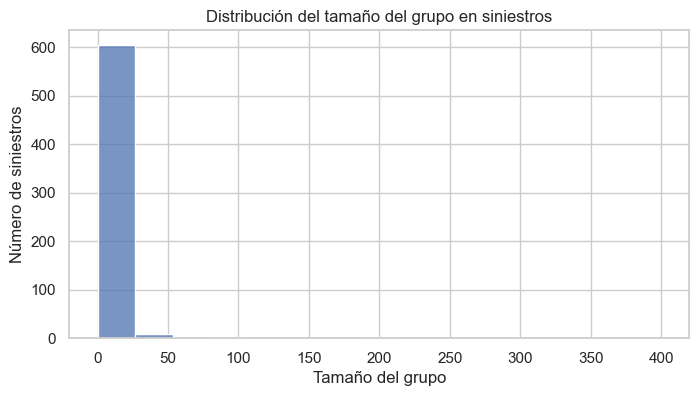

In [26]:
plt.figure(figsize=(8, 4))
sns.histplot(df_partes['tamanogrupo'], bins=15, kde=False)
plt.title("Distribución del tamaño del grupo en siniestros")
plt.xlabel("Tamaño del grupo")
plt.ylabel("Número de siniestros")
plt.show()


In [27]:
# verificar fecha de los partes 

df_partes['fechaparteaccidente'] = pd.to_datetime(
    df_partes['fechaparteaccidente'],
    errors='coerce'
)

df_partes['fechaparteaccidente'].dt.year.value_counts()


fechaparteaccidente
2024    625
Name: count, dtype: int64

#### Conclusión del EDA univariable

El análisis univariable del dataset de partes permite identificar la distribución de los siniestros según **tipo de accidente, gravedad, actividad y localización**, proporcionando una visión descriptiva del perfil de los accidentes registrados, **sin establecer relaciones causales**.

Asimismo, se observa que **la siniestralidad se concentra en un número reducido de tipologías de accidente**, principalmente relacionadas con **caídas y tropiezos**, lo que sugiere la existencia de **patrones claros de riesgo recurrente**.
